In [109]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
from keras.models import Model, Sequential
from keras import optimizers, layers
from keras.utils import to_categorical
from keras.layers import Input, Add, Dense, Flatten, Conv2D, Dropout, AveragePooling2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import ResNet50


In [115]:
image_generator=ImageDataGenerator(rescale=1./255, validation_split=0.70)  #adjust the pixel value to 0-1, transfer learning only pick 30% of all images for training model

In [116]:
train_generator=image_generator.flow_from_directory(batch_size=8, shuffle=True, directory="./train",target_size=(64, 64), class_mode='binary', subset='training')
#validation_generator=image_generator.flow_from_directory(batch_size=8, shuffle=True, directory="./train",target_size=(256, 256), class_mode='binary', subset='validation')

Found 1566 images belonging to 2 classes.


In [117]:
test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_directory(batch_size=8, directory='./test', shuffle=True, target_size=(64,64), class_mode='binary')

Found 624 images belonging to 2 classes.


In [100]:
label_names={0:'normal', 1:'Pneumonia'}

In [118]:
# Transfer Learning using pre_trained Resnet model 
basemodel=ResNet50(weights='imagenet', include_top=False,input_tensor=Input(shape=(64,64, 3)))

In [119]:
# freezing layers in the model
for layer in basemodel.layers[:-10]:
    layers.trainable=False

In [121]:
# build and train deep learning model
CNNmodel=basemodel.output
CNNmodel=MaxPooling2D(pool_size=(2,2))(CNNmodel)
CNNmodel=Dropout(0.3)(CNNmodel)

CNNmodel=Flatten(name='flatten')(CNNmodel)
CNNmodel=Dense(128, activation='relu')(CNNmodel)
CNNmodel=Dropout(0.2)(CNNmodel)
CNNmodel=Dense(128, activation='relu')(CNNmodel)
CNNmodel=Dropout(0.2)(CNNmodel)
CNNmodel=Dense(1, activation='sigmoid')(CNNmodel)

In [122]:
model=Model(inputs=basemodel.input, outputs=CNNmodel)

In [123]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [124]:
earlystopping=EarlyStopping(monitor='val_loss', mode='min', patience=10)
checkpointer=ModelCheckpoint(filepath='weights.hdf5',verbose=1, save_best_only=True)

In [125]:
history=model.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=[checkpointer, earlystopping], steps_per_epoch=len(train_generator)//8)

Epoch 1/20
24/24 [==============================] - ETA: 0s - loss: 0.6341 - accuracy: 0.7842
Epoch 00001: val_loss improved from inf to 99.02632, saving model to weights.hdf5
24/24 [==============================] - 42s 2s/step - loss: 0.6341 - accuracy: 0.7842 - val_loss: 99.0263 - val_accuracy: 0.6250
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 0.3078 - accuracy: 0.8854
Epoch 00002: val_loss did not improve from 99.02632
24/24 [==============================] - 33s 1s/step - loss: 0.3078 - accuracy: 0.8854 - val_loss: 3013.3740 - val_accuracy: 0.6250
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 0.4782 - accuracy: 0.8526
Epoch 00003: val_loss did not improve from 99.02632
24/24 [==============================] - 34s 1s/step - loss: 0.4782 - accuracy: 0.8526 - val_loss: 9166.2539 - val_accuracy: 0.6250
Epoch 4/20
24/24 [==============================] - ETA: 0s - loss: 0.7391 - accuracy: 0.8229
Epoch 00004: val_loss did not improve from 9

Text(0, 0.5, 'Validation accuracy and loss')

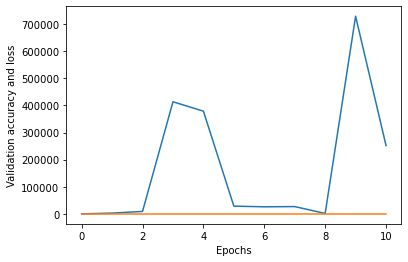

In [126]:
# plot validation data "loss" and "accuracy score"
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy and loss')

No handles with labels found to put in legend.


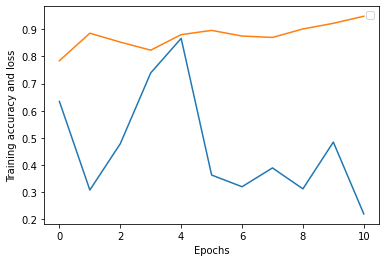

In [128]:
# plot training data "loss" and 'accuracy score"
history.history.keys()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Training accuracy and loss')
plt.legend()